In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv('placement.csv')
df.head(3)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0


In [2]:
df=df.iloc[:, 1:] # remove 1st colunm
df.head(5)

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


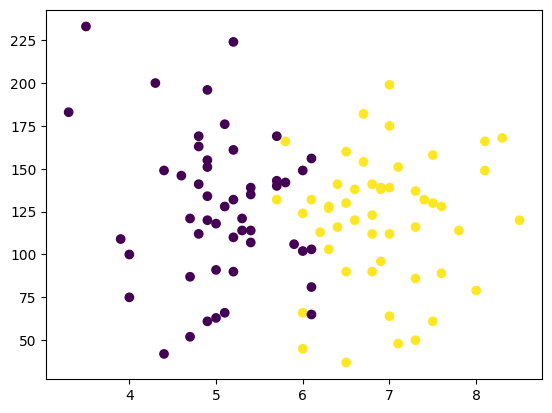

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [4]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

SCALING PROCESS 

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [7]:
x_train= scaler.fit_transform(x_train)
x_train

array([[-1.89865864, -0.3104964 ],
       [ 0.90412316,  1.31591329],
       [-1.08494779,  1.16805787],
       [ 0.09041232, -0.45835182],
       [ 0.90412316,  0.42878074],
       [ 1.44659706,  0.15771245],
       [ 0.        , -1.88762094],
       [ 1.80824632, -1.04977353],
       [-0.5424739 , -0.18728354],
       [ 0.18082463, -0.21192611],
       [-0.72329853, -0.28585382],
       [ 0.09041232,  0.25628274],
       [-1.08494779,  1.02020244],
       [-0.72329853,  0.25628274],
       [-0.5424739 , -0.35978154],
       [ 0.72329853,  0.47806588],
       [ 0.27123695,  0.13306988],
       [-1.17536011, -0.85263296],
       [ 0.5424739 , -0.03942811],
       [-1.53700938,  1.93197757],
       [ 0.63288621,  1.48841129],
       [-0.99453548,  0.82306187],
       [-0.72329853,  2.52339928],
       [ 1.17536011,  0.37949559],
       [-0.90412316, -0.75406267],
       [-0.18082463,  1.09413015],
       [ 2.07948327,  1.1434153 ],
       [ 0.63288621,  0.7984193 ],
       [-0.81371085,

In [8]:
x_test=scaler.transform(x_test)
x_test

array([[-0.99453548,  0.30556788],
       [-1.26577243,  0.60127873],
       [ 0.99453548,  0.72449159],
       [-0.99453548,  1.83340729],
       [-1.08494779, -0.23656868],
       [-0.63288621, -0.18728354],
       [ 1.89865864,  1.09413015],
       [ 2.26030791, -0.03942811],
       [-0.99453548,  0.72449159],
       [ 0.        ,  0.05914217]])

TRAIN THE MODEL

In [9]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()


In [10]:
# Model Training
clf.fit(x_train,y_train)

LogisticRegression()

In [11]:
# Evalution
y_pred=clf.predict(x_test)
y_pred


array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [12]:
y_test

40    0
39    0
21    1
80    0
59    0
46    0
65    1
69    1
89    0
27    1
Name: placement, dtype: int64

In [13]:
from sklearn.metrics import accuracy_score


In [14]:
accuracy_score(y_test,y_pred)

0.9

<Axes: >

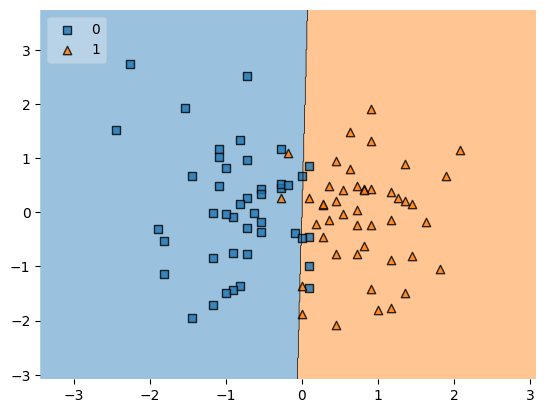

In [15]:
# PLOTTING DECISION BOUNDARY
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [16]:
import pickle

In [17]:
pickle.dump(clf,open('model.pkl','wb'))